<a href="https://colab.research.google.com/github/hence-hanz/my-major/blob/main/Copy_of_XSS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/XSS Dataset/Data_66_featurs.csv")

In [ ]:
dataset.shape

(138567, 68)

In [ ]:
dataset.isnull().sum()

url_length                0
url_special_characters    0
url_tag_script            0
url_tag_iframe            0
url_attr_src              0
                         ..
js_min_define_function    0
js_min_function_calls     0
js_string_max_length      0
html_length               0
Label                     0
Length: 68, dtype: int64

In [ ]:
dataset.columns

Index(['url_length', 'url_special_characters', 'url_tag_script',
       'url_tag_iframe', 'url_attr_src', 'url_event_onload',
       'url_event_onmouseover', 'url_cookie', 'url_number_keywords_param',
       'url_number_domain', 'html_tag_script', 'html_tag_iframe',
       'html_tag_meta', 'html_tag_object', 'html_tag_embed', 'html_tag_link',
       'html_tag_svg', 'html_tag_frame', 'html_tag_form', 'html_tag_div',
       'html_tag_style', 'html_tag_img', 'html_tag_input', 'html_tag_textarea',
       'html_attr_action', 'html_attr_background', 'html_attr_classid',
       'html_attr_codebase', 'html_attr_href', 'html_attr_longdesc',
       'html_attr_profile', 'html_attr_src', 'html_attr_usemap',
       'html_attr_http-equiv', 'html_event_onblur', 'html_event_onchange',
       'html_event_onclick', 'html_event_onerror', 'html_event_onfocus',
       'html_event_onkeydown', 'html_event_onkeypress', 'html_event_onkeyup',
       'html_event_onload', 'html_event_onmousedown', 'html_event_onm

In [ ]:
dataset.describe()

,url_length,url_special_characters,url_tag_script,url_tag_iframe,url_attr_src,url_event_onload,url_event_onmouseover,url_cookie,url_number_keywords_param,url_number_domain,...,js_method_alert,js_method_eval,js_method_fromCharCode,js_method_confirm,js_min_length,js_min_define_function,js_min_function_calls,js_string_max_length,html_length,Label
count,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,...,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,1.385670e+05,1.385670e+05,138567.000000
mean,66.846796,0.257709,0.228922,0.010825,0.032439,0.003421,0.002129,0.048143,0.161366,1.150404,...,0.419559,0.114125,0.159273,0.020091,179.028044,0.041316,1.495472,7.495092e+03,8.125411e+04,0.278335
std,64.860126,0.437375,0.420140,0.103479,0.177164,0.058387,0.046091,0.214069,0.419474,0.544714,...,1.513329,1.171542,0.710273,0.235211,4566.944738,0.923977,32.885729,4.930472e+04,1.503342e+05,0.448181
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,4.530000e+02,1.704150e+04,0.000000
50%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,1.291000e+03,4.247400e+04,0.000000
75%,86.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,73.000000,0.000000,1.000000,3.600000e+03,9.254800e+04,1.000000
max,3158.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,32.000000,...,282.000000,296.000000,77.000000,27.000000,781727.000000,119.000000,3603.000000,4.666062e+06,1.189560e+07,1.000000


In [ ]:
# Splitting Data into training and testing
x = dataset.drop(columns="Label",axis=1)
y = dataset["Label"]

In [ ]:
# Data Splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [ ]:
# Model Selection
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
train_prediction = model.predict(x_train)

In [ ]:
test_prediction = model.predict(x_test)

In [ ]:
Train_Accuracy = accuracy_score(train_prediction,y_train) * 100

In [ ]:
print("Accuracy Score for the Train data detection : " + str(round(Train_Accuracy,1)) + "%")

Accuracy Score for the Train data detection : 100.0%


In [ ]:
Test_Accuracy = accuracy_score(test_prediction,y_test) * 100

In [ ]:
print("Accuracy Score for the Test data detection : " + str(round(Test_Accuracy,1)) + "%")

Accuracy Score for the Test data detection : 98.9%


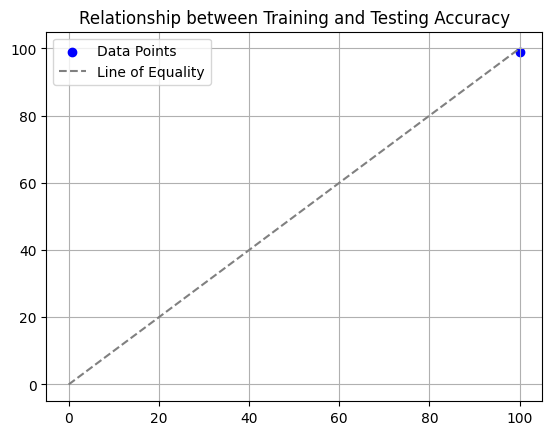

In [ ]:
#Plot the graph for visualization
plt.scatter(Train_Accuracy, Test_Accuracy, marker='o', color='blue', label='Data Points')
plt.plot([0, 100], [0, 100], linestyle='--', color='gray', label='Line of Equality')
plt.title("Relationship between Training and Testing Accuracy")
plt.legend()
plt.grid(True)
plt.show()

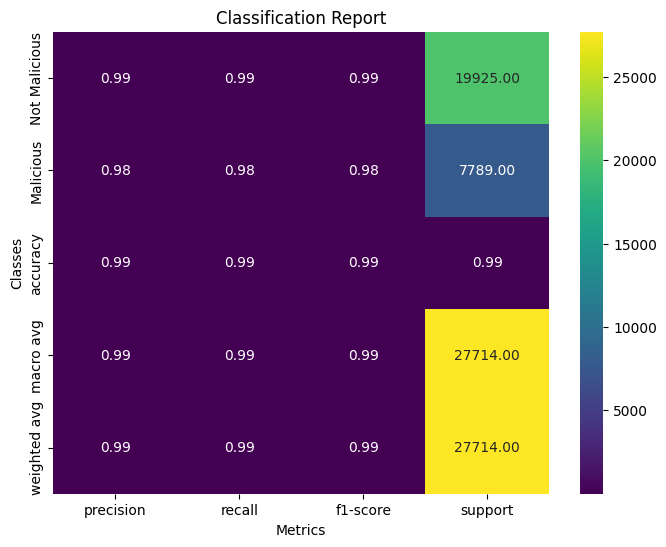

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

# Generate predictions for the test set
y_pred = model.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Malicious', 'Malicious'], output_dict=True)

# Convert the classification report to a string
report_str = classification_report(y_test, y_pred, target_names=['Not Malicious', 'Malicious'])

# Plot the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report).transpose(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig('classification_report.png')  # Save the plot as an image file
plt.show()


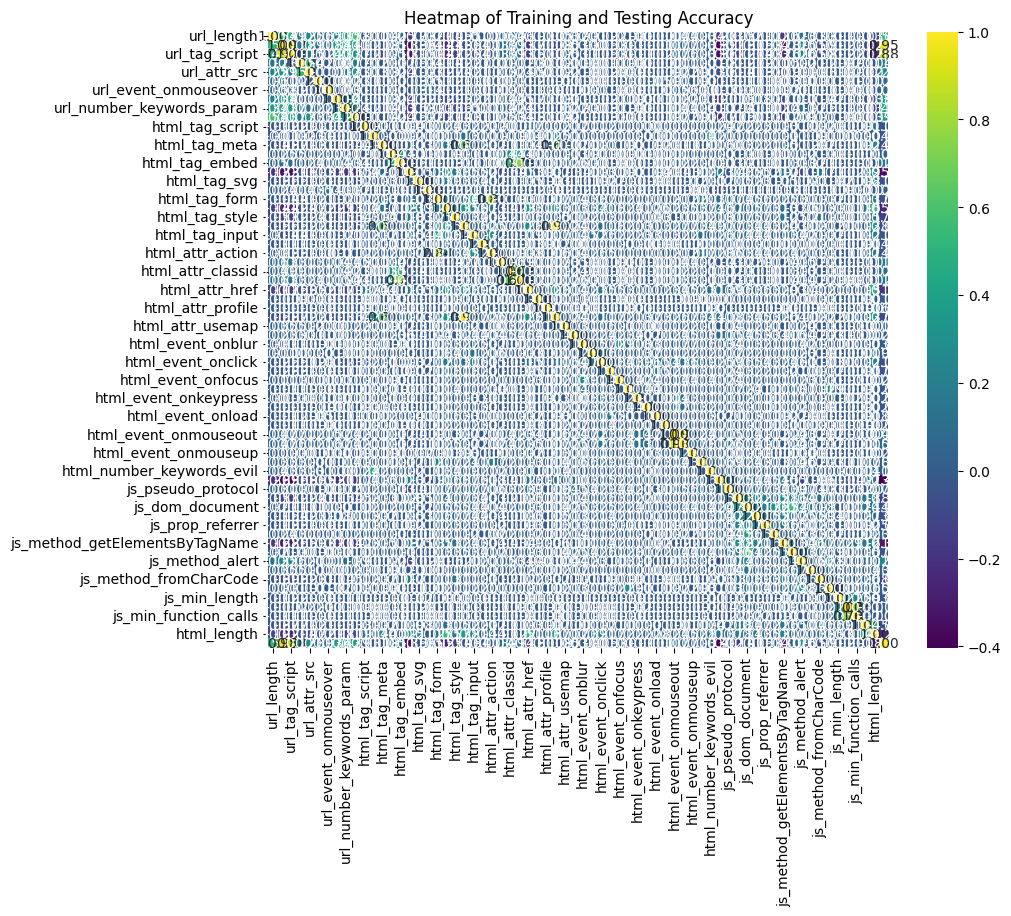

In [ ]:
# Data Visualization using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap of Training and Testing Accuracy")
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate predictions for the test set
y_pred = model.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Malicious', 'Malicious'], output_dict=True)

# Convert the classification report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Print the DataFrame
print("Classification Report:")
print(df_report)


Classification Report:
               precision    recall  f1-score       support
Not Malicious   0.992227  0.993074  0.992651  19925.000000
Malicious       0.982244  0.980100  0.981171   7789.000000
accuracy        0.989428  0.989428  0.989428      0.989428
macro avg       0.987236  0.986587  0.986911  27714.000000
weighted avg    0.989422  0.989428  0.989424  27714.000000


In [ ]:
feature_names = ['url_length', 'url_special_characters', 'url_tag_script', 'url_tag_iframe', 'url_attr_src', 'url_event_onload', 'url_event_onmouseover', 'url_cookie', 'url_number_keywords_param', 'url_number_domain', 'html_tag_script', 'html_tag_iframe', 'html_tag_meta', 'html_tag_object', 'html_tag_embed', 'html_tag_link', 'html_tag_svg', 'html_tag_frame', 'html_tag_form', 'html_tag_div', 'html_tag_style', 'html_tag_img', 'html_tag_input', 'html_tag_textarea', 'html_attr_action', 'html_attr_background', 'html_attr_classid', 'html_attr_codebase', 'html_attr_href', 'html_attr_longdesc', 'html_attr_profile', 'html_attr_src', 'html_attr_usemap', 'html_attr_http-equiv', 'html_event_onblur', 'html_event_onchange', 'html_event_onclick', 'html_event_onerror', 'html_event_onfocus', 'html_event_onkeydown', 'html_event_onkeypress', 'html_event_onkeyup', 'html_event_onload', 'html_event_onmousedown', 'html_event_onmouseout', 'html_event_onmouseover', 'html_event_onmouseup', 'html_event_onsubmit', 'html_number_keywords_evil', 'js_file', 'js_pseudo_protocol', 'js_dom_location', 'js_dom_document', 'js_prop_cookie', 'js_prop_referrer', 'js_method_write', 'js_method_getElementsByTagName', 'js_method_getElementById', 'js_method_alert', 'js_method_eval', 'js_method_fromCharCode', 'js_method_confirm', 'js_min_length', 'js_min_define_function', 'js_min_function_calls', 'js_string_max_length']

print("Decision Tree Rules:")
tree_rules = []
def traverse_tree(node, depth):
    indent = "  " * depth
    if node >= len(model.tree_.feature):
        return
    if model.tree_.children_left[node] == model.tree_.children_right[node]:
        tree_rules.append(f"{indent}Leaf node: Predicted class {model.classes_[np.argmax(model.tree_.value[node])]}")
    else:
        feature = model.tree_.feature[node]
        threshold = model.tree_.threshold[node]
        if feature >= len(feature_names):
            return
        if threshold == -2:
            tree_rules.append(f"{indent}Leaf node: Predicted class {model.classes_[np.argmax(model.tree_.value[node])]}")
        else:
            tree_rules.append(f"{indent}If feature {feature_names[feature]} <= {threshold}:")
            traverse_tree(model.tree_.children_left[node], depth + 1)
            tree_rules.append(f"{indent}else:")
            traverse_tree(model.tree_.children_right[node], depth + 1)

traverse_tree(0, 0)
print("\n".join(tree_rules))

Decision Tree Rules:
If feature url_special_characters <= 0.5:
  If feature js_method_alert <= 0.5:
    If feature html_tag_div <= 6.5:
      If feature url_attr_src <= 0.5:
        If feature html_number_keywords_evil <= 0.5:
          If feature url_length <= 38.5:
            If feature html_tag_form <= 2.5:
              If feature html_tag_input <= 24.5:
                If feature html_tag_iframe <= 6.5:
                else:
                  If feature html_tag_meta <= 7.0:
                    Leaf node: Predicted class 1
                  else:
                    Leaf node: Predicted class 0
              else:
                If feature js_min_function_calls <= 0.5:
                  Leaf node: Predicted class 0
                else:
                  Leaf node: Predicted class 1
            else:
              If feature url_length <= 33.5:
                If feature html_event_onmouseover <= 5.5:
                  Leaf node: Predicted class 0
                else:
         

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
features_name = [
    'url_length', 'url_special_characters', 'url_tag_script', 'url_tag_iframe', 'url_attr_src', 'url_event_onload',
    'url_event_onmouseover', 'url_cookie', 'url_number_keywords_param', 'url_number_domain', 'html_tag_script',
    'html_tag_iframe', 'html_tag_meta', 'html_tag_object', 'html_tag_embed', 'html_tag_link', 'html_tag_svg',
    'html_tag_frame', 'html_tag_form', 'html_tag_div', 'html_tag_style', 'html_tag_img', 'html_tag_input',
    'html_tag_textarea', 'html_attr_action', 'html_attr_background', 'html_attr_classid', 'html_attr_codebase',
    'html_attr_href', 'html_attr_longdesc', 'html_attr_profile', 'html_attr_src', 'html_attr_usemap',
    'html_attr_http-equiv', 'html_event_onblur', 'html_event_onchange', 'html_event_onclick', 'html_event_onerror',
    'html_event_onfocus', 'html_event_onkeydown', 'html_event_onkeypress', 'html_event_onkeyup', 'html_event_onload',
    'html_event_onmousedown', 'html_event_onmouseout', 'html_event_onmouseover', 'html_event_onmouseup',
    'html_event_onsubmit', 'html_number_keywords_evil', 'js_file', 'js_pseudo_protocol', 'js_dom_location',
    'js_dom_document', 'js_prop_cookie', 'js_prop_referrer', 'js_method_write', 'js_method_getElementsByTagName',
    'js_method_getElementById', 'js_method_alert', 'js_method_eval', 'js_method_fromCharCode', 'js_method_confirm',
    'js_min_length', 'js_min_define_function', 'js_min_function_calls', 'js_string_max_length', 'Label'
]
export_graphviz(model, out_file="tree.dot", feature_names=features_name, class_names=['0', '1'], filled=True, rounded=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)

graph.size = '8,8'

graph.render("decision_tree", format="pdf", cleanup=True)


'decision_tree.pdf'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# Define predict function
def predict_fn(X):
    return model.predict_proba(X)

# Check if x_train and feature_names are properly defined
if x_train is not None and feature_names is not None:
    # Verify the shape of x_train
    print("Shape of x_train:", x_train.shape)

    # Ensure the feature names are not empty
    if len(feature_names) > 0:
        # Create LimeTabularExplainer instance
        explainer = LimeTabularExplainer(x_train.values,
                                          feature_names=feature_names,
                                          class_names=['Not Malicious', 'Malicious'],
                                          discretize_continuous=True)

        # Check if the explainer is properly created
        if explainer is not None:
            print("LimeTabularExplainer created successfully.")

            # Ensure x_test is not empty and contains valid data
            if x_test is not None and not x_test.empty:
                # Ensure the index 0 is valid
                if len(x_test) > 0:
                    # Access the first instance in x_test
                    instance_idx = 0
                    instance = x_test.iloc[instance_idx]  # Assuming x_test is a DataFrame


                    # Explain the instance
                    exp = explainer.explain_instance(instance.values, predict_fn, num_features=len(feature_names))

                    # Print explanation as text
                    print("Explanation as text:")
                    print(exp.as_list())

                    # Plot explanation
                    print("Plotting explanation...")
                    fig = exp.as_pyplot_figure()
                    fig.savefig("explanation.pdf") # Save the figure before displaying it
                    plt.show()
                else:
                    print("Error: x_test is empty, cannot access index 0.")
            else:
                print("Error: x_test is not properly defined or contains no data.")
        else:
            print("Error: Failed to create LimeTabularExplainer.")
    else:
        print("Error: feature_names is empty.")
else:
    print("Error: x_train or feature_names is not properly defined.")


Shape of x_train: (110853, 67)


IndexError: list index out of range